## MACD

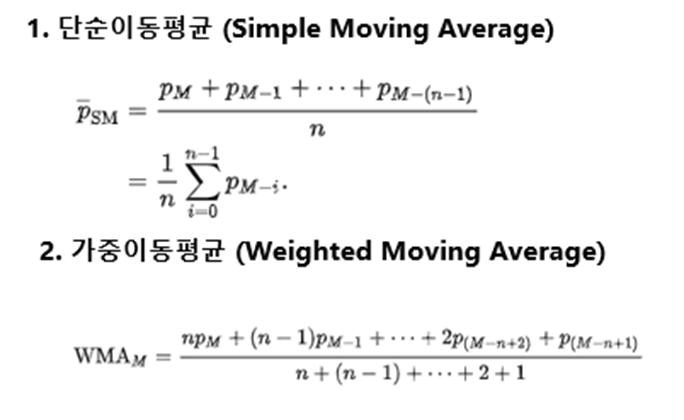

1. **MACD곡선** : 12일 지수이평선 - 26일 지수이평선
2. **MACD시그널** : MACD곡선의 9일 지수이평선
3. **MACD히스토그램** : MACD곡선 - MACD시그널

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import json

In [3]:
stock2code = json.load(open('./data/stock2code.json', 'r'))
df = fdr.DataReader(stock2code['SK하이닉스'], '2015')

ewm12w = df.Close.ewm(span=60).mean()   #12주 이평선
ewm26w = df.Close.ewm(span=130).mean() #26주 이평선
macdline = ewm12w - ewm26w  #macd곡선
macdsign = macdline.ewm(span=45).mean()  #macd시그널
macdhist = macdline - macdsign  #macd히스토그램

### matplotlib으로 MACD 시각화

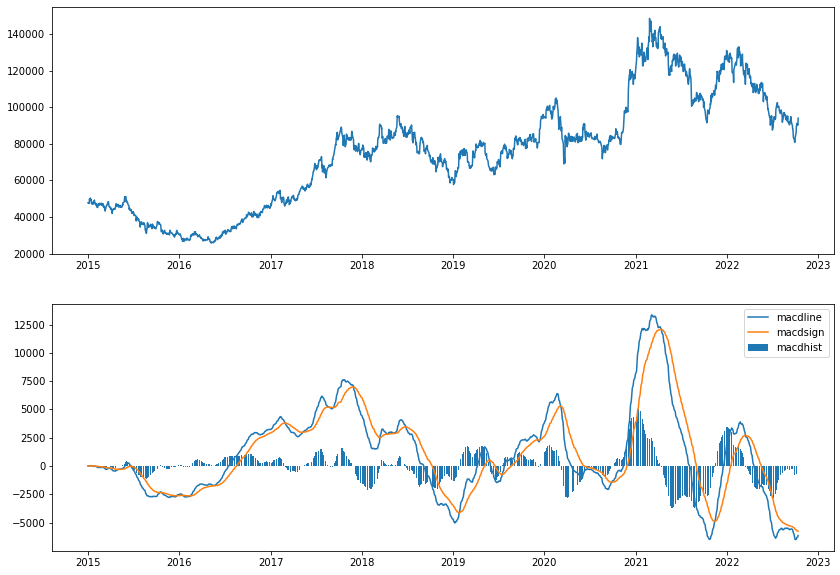

In [4]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.plot(df.Close)

plt.subplot(2,1,2)
plt.plot(macdline, label='macdline')
plt.plot(macdsign, label='macdsign')
plt.bar(macdhist.index, macdhist, label='macdhist')
plt.legend()
plt.show()

### plotly로 MACD시각화

In [5]:
total_df = pd.concat([df, ewm12w, ewm26w, macdline, macdsign, macdhist], axis=1).dropna()
total_df.columns = df.columns.tolist() + ['EWM12W','EWM26W','MACDLINE','MACDSIGN','MACDHIST']
total_df.tail()

,Open,High,Low,Close,Volume,Change,EWM12W,EWM26W,MACDLINE,MACDSIGN,MACDHIST
Date,,,,,,,,,,,
2022-10-05,90000,90400,88100,89800,5927256,0.041763,92548.367354,99000.945720,-6452.578366,-5664.767876,-787.810490
2022-10-06,90900,92000,89800,89900,3039698,0.001114,92461.535637,98861.999984,-6400.464347,-5696.754679,-703.709668
2022-10-07,89600,91800,87800,91200,3100583,0.014461,92420.173813,98745.022885,-6324.849072,-5724.063131,-600.785941
2022-10-11,89700,91200,88000,90200,3840842,-0.010965,92347.381229,98614.564520,-6267.183291,-5747.677051,-519.506240
2022-10-12,91000,94000,90900,94000,4640862,0.042129,92401.565451,98544.113153,-6142.547702,-5764.845340,-377.702362


In [8]:
#!pip install cufflinks
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline(connected=True)

qplot = cf.QuantFig(total_df, title='MACD', legend='top', name='MACD')

In [9]:
qplot.add_ema(periods=130, column='Close', color='red')
qplot.add_volume(column='MACDHIST', name='MACD-HIST')
qplot.add_macd(60, 130, 45)
qplot.iplot()

## 볼린저밴드

In [10]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,96000,96200,94100,94700,2342070,0.006376
2020-01-03,96500,97900,94300,94500,3021380,-0.002112
2020-01-06,93000,95300,92800,94300,2577573,-0.002116
2020-01-07,94500,95400,94000,94000,2489429,-0.003181
2020-01-08,96400,99500,95200,97400,7014748,0.036170
...,...,...,...,...,...,...
2022-10-05,90000,90400,88100,89800,5927256,0.041763
2022-10-06,90900,92000,89800,89900,3039698,0.001114
2022-10-07,89600,91800,87800,91200,3100583,0.014461


In [11]:
df['MA20'] = df.Close.rolling(window=20).mean() # 20일 이평선
df['STD'] = df.Close.rolling(window=20).std()   # 20일 이동표준편차
df['UB'] = df.MA20 + df.STD * 2    # upper band
df['LB'] = df.MA20 - df.STD * 2    # lower band
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB
Date,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173
...,...,...,...,...,...,...,...,...,...,...
2022-10-05,90000,90400,88100,89800,5927256,0.041763,87790.0,4323.972345,96437.944690,79142.055310
2022-10-06,90900,92000,89800,89900,3039698,0.001114,87730.0,4283.763717,96297.527433,79162.472567
2022-10-07,89600,91800,87800,91200,3100583,0.014461,87700.0,4255.770077,96211.540154,79188.459846


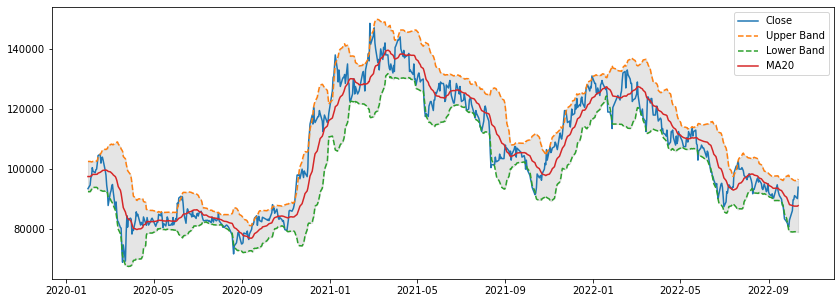

In [12]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='Upper Band')
plt.plot(df.index, df.LB, linestyle='--', label='Lower Band')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='grey', alpha=0.2)
plt.legend()
plt.show()

### %b

In [13]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df['MA20'] = df.Close.rolling(window=20).mean() # 20일 이평선
df['STD'] = df.Close.rolling(window=20).std()   # 20일 이동표준편차
df['UB'] = df.MA20 + df.STD * 2
df['LB'] = df.MA20 - df.STD * 2
df['pct_b'] = (df.Close - df.LB) / (df.UB - df.LB)
df.dropna(inplace=True)
df

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b
Date,,,,,,,,,,,
2020-01-31,94500,97500,93500,93500,4597139,-0.005319,97540.0,2509.854263,102559.708526,92520.291474,0.097586
2020-02-03,91800,95600,91500,94700,3725535,0.012834,97540.0,2509.854263,102559.708526,92520.291474,0.217115
2020-02-04,94800,97500,94500,97100,3169743,0.025343,97670.0,2409.433216,102488.866431,92851.133569,0.440857
2020-02-05,99300,99300,96900,97700,2911995,0.006179,97840.0,2275.360006,102390.720012,93289.279988,0.484618
2020-02-06,98900,101000,98300,100500,2861441,0.028659,98165.0,2159.257913,102483.515827,93846.484173,0.770348
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05,90000,90400,88100,89800,5927256,0.041763,87790.0,4323.972345,96437.944690,79142.055310,0.616213
2022-10-06,90900,92000,89800,89900,3039698,0.001114,87730.0,4283.763717,96297.527433,79162.472567,0.626641
2022-10-07,89600,91800,87800,91200,3100583,0.014461,87700.0,4255.770077,96211.540154,79188.459846,0.705603


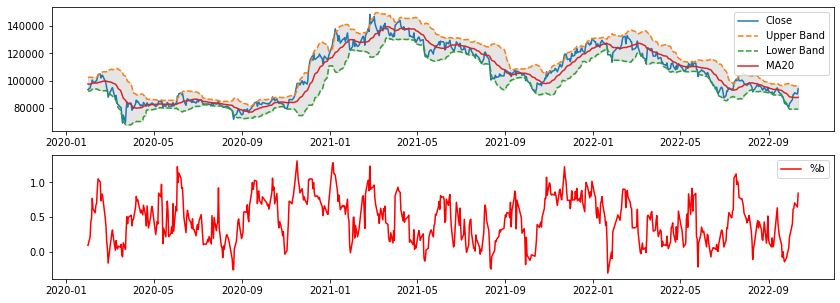

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='Upper Band')
plt.plot(df.index, df.LB, linestyle='--', label='Lower Band')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='grey', alpha=0.2)
plt.legend()


plt.subplot(212)
plt.plot(df.index, df.pct_b, label='%b', color='red')
plt.legend()
plt.show()

### band width

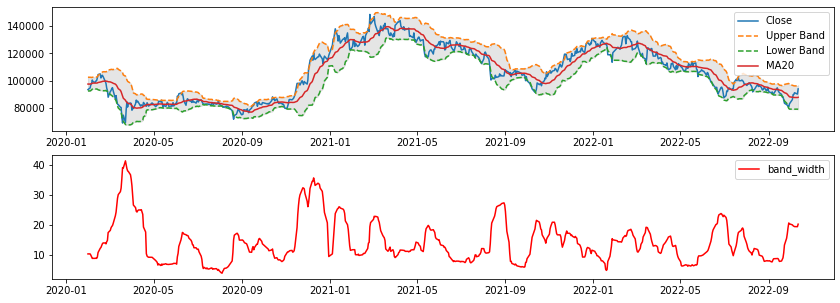

In [15]:
df = fdr.DataReader(stock2code['SK하이닉스'], '2020')
df['MA20'] = df.Close.rolling(window=20).mean() # 20일 이평선
df['STD'] = df.Close.rolling(window=20).std()
df['UB'] = df.MA20 + df.STD * 2
df['LB'] = df.MA20 - df.STD * 2
df['pct_b'] = (df.Close - df.LB) / (df.UB - df.LB)
df['bw'] = (df.UB - df.LB) / df.MA20  * 100
df.dropna(inplace=True)


plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='Upper Band')
plt.plot(df.index, df.LB, linestyle='--', label='Lower Band')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='grey', alpha=0.2)
plt.legend()


plt.subplot(212)
plt.plot(df.index, df.bw, label='band_width', color='red')
plt.legend()
plt.show()

### trend-follwing

- %b > 0.8 and MFI > 80 : **Long**
- %b < 0.2 and MFI < 20 : **Short**

- MFI = 100 - (100 / (1 + PMF/NMF) )

- 중심가격(typical Price) : High, Low, Close의 평균
- 현금흐름(Money Flow) : Typical Price * Volume
- PMF : 중심가격이 전일보다 상승한 날들의 MF의 합
- NMF : 중심가격이 전일보다 하락한 날들의 MF의 합

In [16]:
df['TP'] = (df.High + df.Low + df.Close) / 3
df['PMF'] = 0
df['NMF'] =  0 

In [17]:
for i in range(len(df.Close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.NMF.values[i+1] = 0 
        
    elif df.TP.values[i] > df.TP.values[i+1]:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.PMF.values[i+1] = 0 

In [18]:
df['MFI'] = 100 - 100 / ( 1 + df.PMF.rolling(20).sum() / df.NMF.rolling(20).sum())

In [19]:
df.dropna(inplace=True)

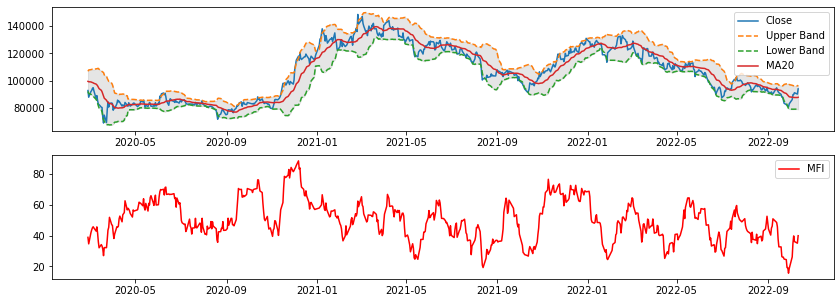

In [20]:
plt.figure(figsize=(14,5))
plt.subplot(211)
plt.plot(df.index, df.Close, label='Close')
plt.plot(df.index, df.UB, linestyle='--', label='Upper Band')
plt.plot(df.index, df.LB, linestyle='--', label='Lower Band')
plt.plot(df.index, df.MA20, label='MA20')
plt.fill_between(df.index, df.UB, df.LB, color='grey', alpha=0.2)
plt.legend()

plt.subplot(212)
plt.plot(df.index, df.MFI, label='MFI', color='red')
plt.legend()
plt.show()

- %b > 0.8 and MFI > 80 : **Long**
- %b < 0.2 and MFI < 20 : **Short**

In [21]:
#LONG 조건에 해당하는 data 조회
df.loc[df.pct_b > 0.8].loc[df.MFI > 80]

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF,MFI
Date,,,,,,,,,,,,,,,,
2020-11-24,101000,102000,98300,98600,3766043,-0.014000,89305.0,7221.712510,103748.425020,74861.574980,0.821773,32.346285,99633.333333,375223417566,0,82.812491
2020-12-02,103000,109500,103000,109000,7488361,0.084577,94990.0,6480.895000,107951.790000,82028.210000,1.040435,27.290852,107166.666667,802502687166,0,83.276042
2020-12-03,110500,114500,109000,111500,6617912,0.022936,96260.0,7105.698232,110471.396465,82048.603535,1.036189,29.527107,111666.666667,739000173333,0,84.100596
2020-12-04,116000,119500,112500,115000,8258814,0.031390,97695.0,7847.659725,113390.319450,81999.680550,1.051279,32.131265,115666.666667,955269486000,0,85.401566
2020-12-07,118500,120000,116000,118000,5191354,0.026087,99295.0,8566.917704,116428.835408,82161.164592,1.045850,34.510973,118000.000000,612579772000,0,88.382663
2020-12-08,118000,118000,114000,115000,4536460,-0.025424,100720.0,8695.951871,118111.903743,83328.096257,0.910536,34.535154,115666.666667,0,524717206666,83.099902
2020-12-09,116000,121000,115000,120500,5490760,0.047826,102395.0,9129.678325,120654.356650,84135.643350,0.995773,35.664547,118833.333333,652485313333,0,83.834746


In [22]:
#SHORT 조건에 해당하는 data 조회
df.loc[df.pct_b < 0.2].loc[df.MFI < 20]

,Open,High,Low,Close,Volume,Change,MA20,STD,UB,LB,pct_b,bw,TP,PMF,NMF,MFI
Date,,,,,,,,,,,,,,,,
2021-08-13,99600,101500,98900,101500,11622957,0.009950,114850.0,5909.626402,126669.252804,103030.747196,-0.064757,20.582068,100633.333333,0,1169656906100,19.266735
2022-09-27,82200,82700,80700,82000,2606333,-0.006061,89985.0,3845.198647,97675.397293,82294.602707,-0.019154,17.092621,81800.000000,0,213198039400,19.248265
2022-09-28,81900,83500,80500,81200,3068181,-0.009756,89420.0,4263.628304,97947.256608,80892.743392,0.018016,19.072370,81733.333333,0,250772660400,19.210845
2022-09-29,82500,82900,80500,80800,2064798,-0.004926,88800.0,4575.219293,97950.438586,79649.561414,0.062862,20.609096,81400.000000,0,168074557200,15.633240
